# Введение в RL и пакет Gymnasium

__Автор задач: Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы:
* https://gymnasium.farama.org/
* https://pypi.org/project/ufal.pybox2d/
* https://gymnasium.farama.org/tutorials/gymnasium_basics/environment_creation/
* https://gymnasium.farama.org/api/spaces/fundamental/
* https://gymnasium.farama.org/environments/toy_text/blackjack/

## Задачи для совместного разбора

1. Рассмотрите пример создания окружения `gymnasium` и основные этапы взаимодействия с этим окружением.
<img src="https://gymnasium.farama.org/_images/AE_loop.png" width="300"/>

In [ ]:
!pip install gymnasium

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.9/953.9 kB 13.0 MB/s eta 0:00:00


In [ ]:
!pip install gymnasium[box2d]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 374.4/374.4 kB 6.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 17.9 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for box2d-py
  Running setup.py clean for box2d-py
Failed to build box2d-py
ERROR: Could not build wheels for box2d-py, which is required to install pyproject.toml-based projects


In [ ]:
!pip install ufal.pybox2d

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 35.7 MB/s eta 0:00:00


In [ ]:
import gymnasium as gym

env = gym.make("LunarLander-v2", render_mode="human")
observation, info = env.reset(seed=42)
env.action_space

Discrete(4)

In [ ]:
observation

array([ 0.00229702,  1.4181306 ,  0.2326471 ,  0.3204666 , -0.00265488,
       -0.05269805,  0.        ,  0.        ], dtype=float32)

In [ ]:
# action = env.action_space.sample()
observation, reward, terminated, truncated, info = env.step(0)

In [ ]:
terminated, truncated

(False, False)

In [ ]:
def policy(env):
  return env.action_space.sample()   # случайное действие

In [ ]:
done = False
observation, info = env.reset(seed=42)

while not done:
  action = policy(env)
  observation, reward, terminated, truncated, info = env.step(action)
  print(f"{action=} {reward=}")
  done = terminated or truncated

action=3 reward=0.4747737628440245
action=3 reward=0.03236716380391272
action=3 reward=-0.16151023266993889
action=2 reward=-5.7309101977108865
action=3 reward=-0.27848649296183114
action=0 reward=0.30494588993792604
action=3 reward=-0.8359168720166099
action=3 reward=-1.4006926766293464
action=1 reward=0.6446949378794227
action=2 reward=-2.350961556683006
action=1 reward=0.7728452175444442
action=3 reward=-1.3602006193480907
action=2 reward=-4.143549974903823
action=0 reward=-0.4747206480709849
action=0 reward=-0.6111314996730925
action=1 reward=0.48301130350637433
action=1 reward=0.6549334828038422
action=3 reward=-1.5119001200506819
action=3 reward=-2.2606618847443642
action=2 reward=-3.7405842193800423
action=0 reward=-1.1062077482828272
action=1 reward=0.12325592070371386
action=3 reward=-2.363731897822332
action=0 reward=-1.5034416530524197
action=2 reward=-2.3951125017635944
action=2 reward=-1.8594985542941516
action=2 reward=-1.9576182254610217
action=3 reward=-2.53845850644904

In [ ]:
# next_state: Это наблюдение, которое агент получит после выполнения действия.
# reward: Это награда, которую агент получит после выполнения действия.
# terminated: Это логическая переменная, которая указывает, завершилась ли игра.
# truncated: Это логическая переменная, которая также указывает, закончился ли эпизод досрочным усечением, т.е.была ли игра обрезана из-за достижения максимального числа шагов.
# info: Это словарь, который может содержать дополнительную информацию об окружающей среде.

# env.reset()  сбрасывает среду в исходное положение и возвращает начальное observation

## Задачи для самостоятельного решения

<p class="task" id="1"></p>

1\. Создайте окружение `Blackjack-v1`. Сыграйте `N=10000` игр, выбирая действие случайным образом. Посчитайте и выведите на экран долю выигранных игр.

- [ ] Проверено на семинаре

In [ ]:
import gymnasium as gym
N = 10000

env = gym.make('Blackjack-v1')

wins = 0
for i in range(N):
    observation, info = env.reset()  # сброс начального положения
    done = False

    while not done:
        action = env.action_space.sample()  # случайноe действиe из всех допустимых действий
        observation, reward, terminated, truncated, info = env.step(action)  # состояние, вознагрждение, инфа о завершении
        if truncated or terminated:  # если игра завершилась
            done =True
        # print(i, observation, reward, terminated, truncated)
    if reward == 1:
        wins+=1
#         print(wins)
#     print(reward)

wins/N

0.2869

In [ ]:
env.close()

<p class="task" id="2"></p>

2\. Создайте окружение `Blackjack-v1`. Предложите стратегию, которая позволит, в среднем, выигрывать чаще, чем случайный выбор действия. Реализуйте эту стратегию и сыграйте `N=10000` игр, выбирая действие согласно этой стратегии. Посчитайте и выведите на экран долю выигранных игр.

- [ ] Проверено на семинаре

In [ ]:
# States:
# current sum (12-21)  (текущая сумма)
# dealer's showing card (ace, 2-10) (карта диллера)

# Reward: (+1 выйгрыш, 0 ничья, -1 проигрыш)
# Actions: stick (прекращение приема карт), hit (получение другой карты)


In [ ]:
#Если сумма карт игрока меньше 14, брать еще карту (hit).
#Если сумма карт игрока больше или равна 14, останавливаться (stick).

import gymnasium as gym
N = 10000

env = gym.make('Blackjack-v1')

wins = 0
for i in range(N):
    observation, info = env.reset()  # сброс начального положения
    done = False

    while not done:   # пока игра не завершится
        if observation[0] <= 14:
            action = 1   # берем карту, hit
        else:
            action = 0 # stick, останавливаемся
        observation, reward, terminated, truncated, info = env.step(action)  # состояние, вознагрждение, инфа о завершении


        if truncated or terminated:  # если игра завершилась
            done =True
        # print(i, observation, reward, terminated, truncated)
    if reward == 1:
        wins+=1


wins/N

/usr/local/lib/python3.10/dist-packages/gymnasium/wrappers/monitoring/video_recorder.py:178: UserWarning: WARN: Unable to save last video! Did you call close()?
  logger.warn("Unable to save last video! Did you call close()?")


0.4249

<p class="task" id="3"></p>

3\. Создайте окружение для игры в крестики-нолики, реализовав интерфейс `gym.Env`. Решение должно удовлетворять следующим условиям:
* для создания пространства состояний используется `spaces.Box`;
* для создания пространства действий используется `spaces.MultiDiscrete`;
* игра прекращается, если:
    - нет возможности сделать ход;
    - игрок пытается отметить уже выбранную ячейку.
* после каждого хода игрок получает награду:
    - 0, если игра не закончена;
    - 1, если игрок выиграл;
    - -1, если игрок проиграл.
* стратегию выбора действия для второго игрока (машины) определите самостоятельно.

Сыграйте одну игру, выбирая действия случайным образом. Выведите на экран состояние окружения после каждого хода и итоговую награду пользователя за сессию.

- [ ] Проверено на семинаре

In [ ]:
import numpy as np
import gymnasium.spaces as spaces
import pandas as pd
import itertools

In [ ]:
class CrossZero:

  def __init__(self):
    # пространство состояний
    self.observation_space = spaces.Box(
        low = -1,   # минимальное значение, которое может принимать состояние в пространстве
        high = 1, # максимальное значение, которое может принимать состояние в пространстве
        shape = (3,3), #  размерность

    )
# пространство действий
    self.action_space = spaces.MultiDiscrete(
        nvec = [3,3]   # две переменные,каждая может принимать значения от 0 до 2 (3 возможных значения)
    )

    # self.board_state = np.zeros((3,3))  # начальное состояние доски
    self.board_state = pd.DataFrame(np.array(
                                [['.', '.', '.'],
                                 ['.', '.', '.'],
                                 ['.', '.', '.']]))
    # self.board_state = pd.DataFrame(np.zeros((3,3)))  # начальное состояние доски
    self.done = False, False   # флаг окончания игры
    self.player = 'x'  # начинают крестики
    self.reward = 0

  def reset(self):
    self.board_state =  pd.DataFrame(np.array(
                                [['.', '.', '.'],
                                 ['.', '.', '.'],
                                 ['.', '.', '.']]))
    # self.board_state =  pd.DataFrame(np.zeros((3,3))) # сброс состояния доски
    self.done = False, False

    return self.board_state, {}

  def check_winner(self):   # проверка на выигрыш

        winning_combinations = [   # выигрышные комбинации
            [(0, 0), (0, 1), (0, 2)],  # 1 строка
            [(1, 0), (1, 1), (1, 2)],  # 2 строка
            [(2, 0), (2, 1), (2, 2)],  # 3 строка
            [(0, 0), (1, 0), (2, 0)],  # 1 столбец
            [(0, 1), (1, 1), (2, 1)],  # 2 столбец
            [(0, 2), (1, 2), (2, 2)],  # 3 столбец
            [(0, 0), (1, 1), (2, 2)],  # главная диагональ
            [(0, 2), (1, 1), (2, 0)]   # побочная  диагональ
        ]
        player_step = set()
        res = None
        for combination in winning_combinations:

            for position in combination:
              if self.board_state[position[0]][position[1]] == self.player:
                player_step.add(position)   # все занятые игороком позиции
            for i in itertools.permutations(player_step, 3):   # все комбинации по 3
              # print(list(i))
              if list(i) == combination:
                # print(combination)
                res = self.player
        if res is None:
          res = 0
        return res  # если никто не выиграл


  def step(self, action):
    # ход
    action = action[::-1]
    if self.board_state[action[0]][action[1]] != '.':   # игрок пытается отметить уже выбранную ячейку
    # игра прекращается
      self.done = False, True
      self.reward = 0
      return self.board_state, self.reward, self.done, {}   # observation, reward, trancated и terminated , info

    # Ход
    self.board_state[action[0]][action[1]] = self.player  # ставим крестик или нолик


    winner = self.check_winner()
    # print('winner', winner, self.player)
    if winner == self.player:  # если  выиграл
      self.reward = 1
      self.done = True, False
    if winner != self.player and winner != 0:   # игрок проиграл, выиграл другой
      self.reward = -1
      self.done = True, False

    else:
      reward = 0

    if self.player == 'x':
        self.player = 'O'  # переход к след игроку
    elif self.player == 'O':
      self.player = 'x'


    return self.board_state, self.reward, self.done, {}

# стратегия для 4 задания
  def policy(self):
    # 1 уровень
    if self.board_state[1][1] == '.':
      action = [1,1]
      return action
    # правая ветка,чтобы выиграли нолики
    # 2 уровень
    elif self.board_state[0][0] == '.':
      return [0,0]

    elif self.board_state[0][0] == 'O' and self.board_state[2][2] =='.':
      return [2,2]

    # elif observation[0][0] == 'O' and observation[2][2] =='O' and observation[1][0] == '.':
    #   return [1,0]

    elif self.board_state[1][0] == '.':
      return [1,0]

    elif self.board_state[1][0] == 'O' and self.board_state[1][2] =='.':
      return [1,2]

    elif self.board_state[2][0] =='.':
      return [2,0]

    elif self.board_state[2][0] == 'O' and self.board_state [0][2] == '.':
      return [0,2]

    else:
        action = list(np.random.randint(0,3, (1,2))[0])
        return action




In [ ]:
env = CrossZero()
observation, info = env.reset()
observation

,0,1,2
0,.,.,.
1,.,.,.
2,.,.,.


In [ ]:
# action
action = list(np.random.randint(0,3, (1,2))[0])
action

[2, 2]

In [ ]:
env = CrossZero()
observation, info = env.reset()

done = False, False

while done[0] == False and done[1] == False:  # пока игра не окончится
    action = list(np.random.randint(0,3, (1,2))[0])
    print(action)
    observation, reward, done, info = env.step(action)
    print(observation, reward, done)
    print()



[0, 0]
   0  1  2
0  x  .  .
1  .  .  .
2  .  .  . 0 (False, False)

[1, 0]
   0  1  2
0  x  .  .
1  O  .  .
2  .  .  . 0 (False, False)

[2, 2]
   0  1  2
0  x  .  .
1  O  .  .
2  .  .  x 0 (False, False)

[0, 1]
   0  1  2
0  x  O  .
1  O  .  .
2  .  .  x 0 (False, False)

[1, 0]
   0  1  2
0  x  O  .
1  O  .  .
2  .  .  x 0 (False, True)



In [ ]:
env.step([0,0])[0]

,0,1,2
0,x,O,.
1,O,.,.
2,.,.,x


<p class="task" id="4"></p>

4\. Предложите стратегию (в виде алгоритма без использования методов машинного обучения), которая позволит, в среднем, выигрывать в крестики-нолики чаще, чем случайный выбор действия. Реализуйте эту стратегию и сыграйте игру, выбирая действия согласно этой стратегии. Выведите на экран состояние окружения после каждого хода и итоговую награду пользователя за сессию.

- [ ] Проверено на семинаре

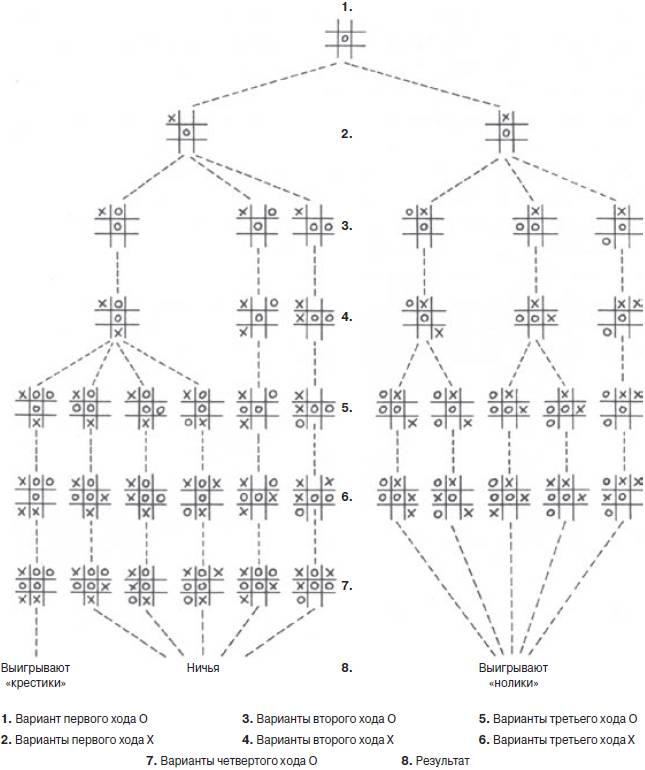

In [ ]:
# закинула в класс


def policy(observtion, env):
    # 1 уровень
  if observation[1][1] == '.':
    action = [1,1]
    return action
  # правая ветка,чтобы выиграли нолики
  # 2 уровень
  elif observation[0][0] == '.':
    return [0,0]

  elif observation[0][0] == 'O' and observation[2][2] =='.':
    return [2,2]

  # elif observation[0][0] == 'O' and observation[2][2] =='O' and observation[1][0] == '.':
  #   return [1,0]

  elif observation[1][0] == '.':
    return [1,0]

  elif observation[1][0] == 'O' and observation[1][2] =='.':
    return [1,2]

  elif observation[2][0] =='.':
    return [2,0]

  elif observation[2][0] == 'O' and observation [0][2] == '.':
    return [0,2]

  else:
      action = list(np.random.randint(0,3, (1,2))[0])
      return action


In [ ]:
env = CrossZero()
observation, info = env.reset()

done = False, False

while done[0] == False and done[1] == False:  # пока игра не окончится
    if env.player == 'x':
      action = list(np.random.randint(0,3, (1,2))[0])
    if env.player == 'O':
      action = env.policy()
    print(env.player, action)
    observation, reward, done, info = env.step(action[::-1])
    print(observation, reward, done)
    print()


x [0, 1]
   0  1  2
0  .  .  .
1  x  .  .
2  .  .  . 0 (False, False)

O [1, 1]
   0  1  2
0  .  .  .
1  x  O  .
2  .  .  . 0 (False, False)

x [1, 2]
   0  1  2
0  .  .  .
1  x  O  .
2  .  x  . 0 (False, False)

O [0, 0]
   0  1  2
0  O  .  .
1  x  O  .
2  .  x  . 0 (False, False)

x [0, 2]
   0  1  2
0  O  .  .
1  x  O  .
2  x  x  . 0 (False, False)

O [2, 2]
   0  1  2
0  O  .  .
1  x  O  .
2  x  x  O 1 (True, False)



In [ ]:
env.step([0,0])[0]

,0,1,2
0,O,.,.
1,x,O,.
2,x,x,O


<p class="task" id="5"></p>

5\. Создайте окружение `MountainCar-v0`. Проиграйте 10 эпизодов и сохраните на диск файл с записью каждого пятого эпизода. Для записи видео воспользуйтесь обёрткой `RecordVideo`. Вставьте скриншот, на котором видно, что файлы были созданы.

- [ ] Проверено на семинаре

In [ ]:
  from gym.wrappers.monitoring import video_recorder
  from gymnasium.wrappers import RecordVideo

In [ ]:
# action
# 0 разгон влево
# 1 движение по инерции
# 2 вправо

# OBSERVATION - начальное положение , скорость

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
env = gym.make('MountainCar-v0', render_mode='rgb_array')
env.observation_space , env.action_space

(Box([-1.2  -0.07], [0.6  0.07], (2,), float32), Discrete(3))

In [ ]:
env = gym.make('MountainCar-v0', render_mode='rgb_array')

env =RecordVideo(
    env,
    video_folder="/content/",
    episode_trigger = lambda x: x % 5 == 0
)

N = 10
wins = 0
observation0, info = env.reset()
# print(observation0[0])
for i in range(N):
    observation, info = env.reset()   # сброс среды
    done = False
    while not done:
        if observation[0] >= observation0[0] and observation[1] > 0:  # машина правее и скорость положительная
          action = 0 # разгон влево
        if observation[0] >= observation0[0] and observation[1] <= 0:  # машина правее
          action = 1 # по инерции
        elif observation[0] < 0.5 :
          action = 2 # вправо

        observation, reward, terminated, truncated, info = env.step(action)
#         print(observation, reward)
        if truncated == True or terminated == True:
          done = True
    # if reward == 0:
    #     wins+=1

# wins/


/usr/local/lib/python3.10/dist-packages/gymnasium/wrappers/record_video.py:94: UserWarning: WARN: Overwriting existing videos at /content folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  logger.warn(


Moviepy - Building video /content/rl-video-episode-0.mp4.
Moviepy - Writing video /content/rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /content/rl-video-episode-0.mp4
Moviepy - Building video /content/rl-video-episode-5.mp4.
Moviepy - Writing video /content/rl-video-episode-5.mp4



Moviepy - Done !
Moviepy - video ready /content/rl-video-episode-5.mp4


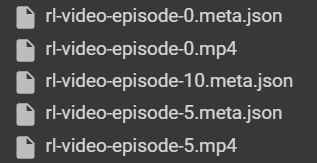

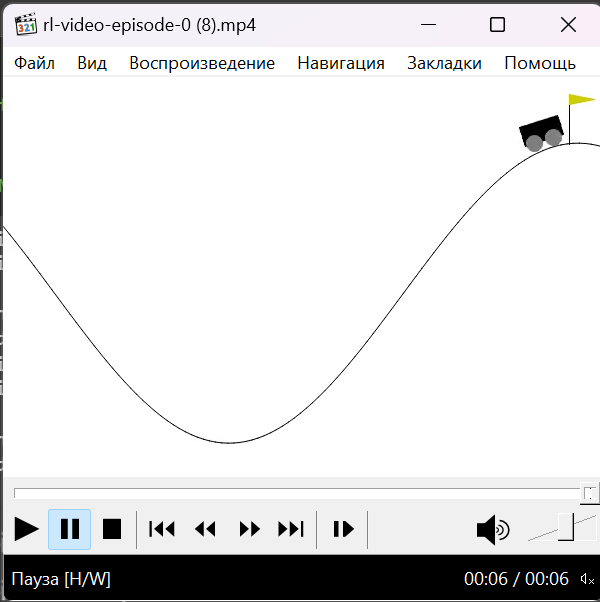

## Обратная связь
- [x] Хочу получить обратную связь по решению